In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

sns.set_style("ticks")
# sns.set_style("white")
# sns.set_style("whitegrid")

In [3]:
photoz_table = pd.read_csv("Fields-DR3/hydra_probgal0.7.csv", usecols=['RA', 'DEC', 'zml', 'odds', 
                                                                       'PROB_GAL', 'r_petro', 'g_petro', 'u_petro'])

In [22]:
ra_pz = photoz_table["RA"]
dec_pz = photoz_table["DEC"]
zml = photoz_table["zml"]
odds = photoz_table["odds"]
prob_gal = photoz_table["PROB_GAL"]
r_petro = photoz_table["r_petro"]
g_petro = photoz_table["g_petro"]
u_petro = photoz_table["u_petro"]

In [5]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

#Defining a mask for the objects inside 1R200
distances = dist(ra_pz, dec_pz)

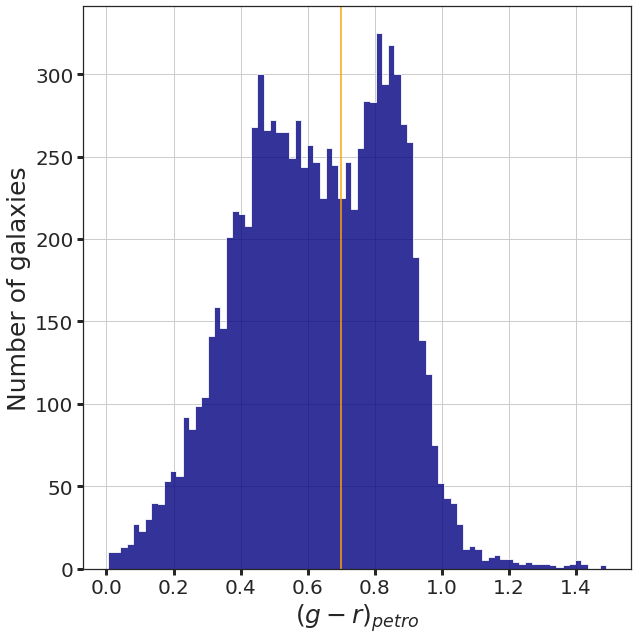

In [99]:
%matplotlib inline
mlim = 19

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
  
mask = (distances < 5*radius) & (odds > 0.7) & (prob_gal > 0.8) & (zml > 0.0) & (zml < 0.1) & (r_petro <
                      mlim) & ((g_petro - r_petro) < 1.5) & ((g_petro - r_petro) > 0)

ax.hist((g_petro - r_petro)[mask], bins=80, color='navy', histtype='stepfilled', alpha=0.8)
# ax.set_title(r"$$".format(mlim), fontsize=25, fontname='fantasy')
ax.set_ylabel("Number of galaxies", fontsize=25)
ax.set_xlabel(r"$(g-r)_{petro}$", fontsize=25)
ax.axvline(0.7, color='orange')

ax.yaxis.set_tick_params(labelsize=20, width=3)
ax.xaxis.set_tick_params(labelsize=20, width=3)

ax.grid()
    
fig.tight_layout()
plt.savefig("../Presentations/cosmo22-splus-poster/color-distribution_g-r-v2.png", format='png')

In [58]:
mask = (odds > 0.7) & (prob_gal > 0.8) & (zml > 0.0) & (zml < 0.1) & (r_petro < 19)

print(np.sum(mask))
print(np.sum((g_petro - r_petro)[mask] > 0.535))
print(np.sum((g_petro - r_petro)[mask] < 0.535))

10875
6833
4042


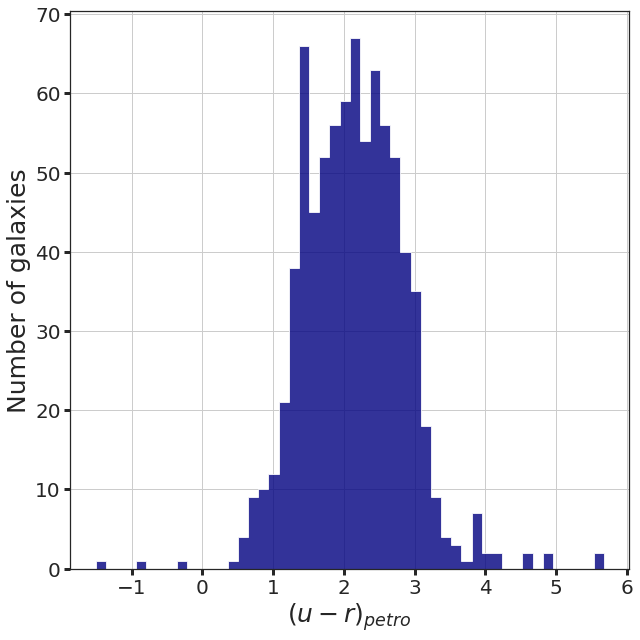

In [88]:
mlim = 19

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
  
mask = (distances < radius) & (odds > 0.7) & (prob_gal > 0.8) & (zml > 0.0) & (zml < 0.1) & (r_petro < mlim) & ((u_petro - r_petro) < 40)
 
ax.hist((u_petro - r_petro)[mask], bins=50, color='navy', histtype='stepfilled', alpha=0.8)
# ax.set_title(r"$$".format(mlim), fontsize=25, fontname='fantasy')
ax.set_ylabel("Number of galaxies", fontsize=25)
ax.set_xlabel(r"$(u-r)_{petro}$", fontsize=25)

ax.yaxis.set_tick_params(labelsize=20, width=3)
ax.xaxis.set_tick_params(labelsize=20, width=3)

ax.grid()
    
fig.tight_layout()
# plt.savefig("../Presentations/cosmo22-splus-poster/color-distribution_u-r.png", format='png')